##Part I

In [53]:
import pandas as pd
#importing dataset
X = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CRL daily collector/CRL (1).csv')
#only selecting the decks of player n.2
X = X[['p2.card_1', 'p2.card_2', 'p2.card_3', 'p2.card_4', 'p2.card_5', 'p2.card_6', 'p2.card_7', 'p2.card_8']]
X

,p2.card_1,p2.card_2,p2.card_3,p2.card_4,p2.card_5,p2.card_6,p2.card_7,p2.card_8
0,Elixir Golem,Inferno Dragon,Arrows,Night Witch,Electro Dragon,Heal Spirit,Rage,Battle Healer
1,Knight,Bats,Spear Goblins,Wall Breakers,Poison,The Log,Miner,Bomb Tower
2,Ice Wizard,Inferno Dragon,Skeleton Army,Balloon,Royal Hogs,Arrows,Zap,Barbarians
3,X-Bow,Tesla,The Log,Fireball,Archers,Ice Golem,Ice Spirit,Skeletons
4,P.E.K.K.A,Poison,Royal Ghost,Battle Ram,Magic Archer,Zap,Bandit,Electro Wizard
...,...,...,...,...,...,...,...,...
659,Giant,Prince,Dark Prince,Mega Minion,Fireball,Miner,Electro Wizard,Zap
660,Miner,Bats,The Log,Ice Golem,Wall Breakers,Bomb Tower,Poison,Spear Goblins
661,Knight,Spear Goblins,Bats,Wall Breakers,Miner,Bomb Tower,Zap,The Log
662,Golem,Barbarian Barrel,Baby Dragon,Lightning,Tornado,Night Witch,Lumberjack,Mega Minion


In [0]:
#https://docs.google.com/spreadsheets/d/1wIH69gfuCCoPRoWOIyUqQHMKkUfpb4GAxUbBYX8PwRc/edit#gid=1477229539
C = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CRL daily collector/CRL_Cards_Classification.csv')
cards_classifier = C.copy()
cards_classifier.pop('Type_1')
cards_classifier = cards_classifier.values.transpose()
cards_classifier

def order_row(list1):
  #mappiamo lista input di carte al tipo
  card_dictionary = dict(zip(cards_classifier[0], cards_classifier[1]))
  card_dictionary

  list_tot_classification = list()
  for m in list1:
    a = card_dictionary.get(m)
    list_tot_classification.append(a)

  list_tot_classification
  #['Spell', 'Troop', 'Troop', 'Win Condition', 'Spell', 'Troop', 'Troop', 'Troop']

  class_dict = {'Win Condition': 0, 'Troop': 1, 'Building': 2, 'Spell': 3}

  #sorted by win condition, Troop, Building then Spell
  list_tot_num = list()
  for m in list_tot_classification:
    a = class_dict.get(m)
    list_tot_num.append(a)
  
  ordered_list = [x for _,x in sorted(zip(list_tot_num, list1))]
  return ordered_list

#example
#list1 = ['Arrows',	'Baby Dragon',	'Bomber', 'Golem',	'Lightning',	'Mega Minion',	'Mini P.E.K.K.A',	'Night Witch', 'Cannon']
#ordered_list = order_row(list1)
#ordered_list

In [56]:
#sort each row based on the format: Win Condition, Troop, Building, Spell
for c in range(len(X.values)):
  X.values[c] = order_row(X.values[c])
  #X.values[c] = sorted(X.values[c])
X = pd.DataFrame(X.values)
X

,0,1,2,3,4,5,6,7
0,Elixir Golem,Battle Healer,Electro Dragon,Inferno Dragon,Night Witch,Arrows,Heal Spirit,Rage
1,Miner,Bats,Knight,Spear Goblins,Wall Breakers,Bomb Tower,Poison,The Log
2,Balloon,Royal Hogs,Barbarians,Ice Wizard,Inferno Dragon,Skeleton Army,Arrows,Zap
3,X-Bow,Archers,Ice Golem,Ice Spirit,Skeletons,Tesla,Fireball,The Log
4,Battle Ram,P.E.K.K.A,Bandit,Electro Wizard,Magic Archer,Royal Ghost,Poison,Zap
...,...,...,...,...,...,...,...,...
659,Giant,Miner,Dark Prince,Electro Wizard,Mega Minion,Prince,Fireball,Zap
660,Miner,Bats,Ice Golem,Spear Goblins,Wall Breakers,Bomb Tower,Poison,The Log
661,Miner,Bats,Knight,Spear Goblins,Wall Breakers,Bomb Tower,The Log,Zap
662,Golem,Baby Dragon,Lumberjack,Mega Minion,Night Witch,Barbarian Barrel,Lightning,Tornado


In [57]:
#flat everything in one list
one_row = list()
for k in X.values:
  for n in k:
    one_row.append(n)
one_row = pd.DataFrame(one_row)
one_row

#labeled list
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(one_row[0])
one_row_labeled = le.transform(one_row[0])
one_row_labeled

#rebuild the original dataset and convert it to DataFrame
import numpy
X_labeled = numpy.array_split(one_row_labeled, (len(one_row)/8))
X_labeled = pd.DataFrame(X_labeled)
X_labeled

,0,1,2,3,4,5,6,7
0,24,9,20,51,67,1,45,72
1,60,8,53,84,91,11,69,86
2,3,79,7,50,51,80,1,94
3,93,0,48,49,82,85,27,86
4,10,68,4,21,57,77,69,94
...,...,...,...,...,...,...,...,...
659,33,60,17,21,59,70,27,94
660,60,8,48,84,91,11,69,86
661,60,8,53,84,91,11,86,94
662,42,2,56,59,67,5,55,89


##Part II

In [58]:
print(max(one_row_labeled), len(X_labeled))

94 664


In [59]:
#one_hot of multiple columns at the same time:
#create an empty dataset of equal lenght of max. label (94), but equal width of our e.X (664)
m = [[0 for x in range(max(one_row_labeled)+1)] for x in range(len(X_labeled))]

#turn each corresponding label to 1
for row in range(len(X_labeled.values)):
  for num in range(len(X_labeled.values[1])):
    m[row][X_labeled.values[row][num]] = 1
m = pd.DataFrame(m)
m

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
660,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
661,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
662,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


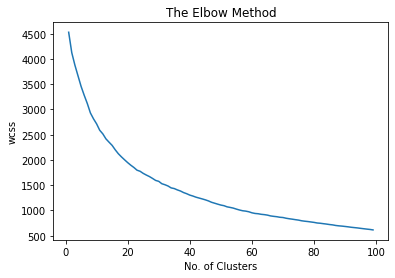

In [60]:
#graph the number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 100):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 0)
  km.fit(m)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 100), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
!pip install kmodes

In [61]:
#mapping each row to its correponding cluster
from kmodes.kmodes import KModes
test=KModes(n_clusters=12, init='Cao') #Huang

cluster=test.fit_predict(m, categorical=list(m.columns))
cluster

array([11,  0,  8,  4,  5,  3,  3, 11, 11,  9,  8, 11,  3,  5,  5,  0,  6,
        1,  8,  3,  3,  0,  8,  4,  8,  0,  0,  5,  7,  1, 11,  3,  1,  8,
        5,  0,  0,  6,  1,  9,  7,  3,  7,  1,  3,  3,  5,  4,  6,  7,  6,
        3,  4,  7,  0,  3,  3,  3, 11,  7,  1,  8,  8,  4,  4,  4,  2,  4,
        5,  7,  6,  1,  8,  1,  3,  8,  4,  3,  5,  0,  2,  1,  5,  1,  1,
        6,  4, 11,  3,  0,  7,  4,  1,  4,  1,  5,  8,  2,  5,  1,  0,  0,
        0,  3,  8,  9,  2,  4,  7,  7,  3, 11,  3, 11, 11,  1,  3,  6,  0,
        1,  4, 11,  3,  7,  6,  1,  4,  0,  3,  8,  3,  3, 11,  7,  1,  1,
        1,  2,  3,  0,  5, 11,  4,  3,  0,  0,  1,  4, 11,  3,  0,  0,  5,
        0,  4, 11,  0,  4,  1, 11,  7,  2,  0,  0,  3,  3,  4,  7,  7, 11,
        1,  3,  7,  5,  1,  4,  8,  4,  8,  3,  5,  0,  8,  4,  4,  4,  0,
        4,  7,  3,  8, 11,  0,  6,  1,  5,  0,  7,  7,  3,  0,  4, 11,  3,
        7,  5,  1,  8,  4,  0,  0,  0,  8,  7,  1,  5,  9,  2, 11,  7,  9,
        4,  8,  8,  8,  0

In [0]:
#convert one_hot numbers to final decks
def archetypes(knode_list):
  #ammassa le coordinate dei numeri 1
  cc = list()
  for n_centroids in range(len(km.cluster_centroids_)):
    for k in range(len(km.cluster_centroids_[n_centroids])):
      if km.cluster_centroids_[n_centroids][k] == 1:
        cc.append(k)
  len(cc)

  #determina il numero di chunks per cluster
  n_chunks = list()
  for am in range(len(km.cluster_centroids_)):
    n_chunks.append((list(km.cluster_centroids_[am]).count(1)))
  n_chunks

  #crea gli archetipi
  from itertools import islice
  it = iter(cc)
  sliced =[list(islice(it, 0, i)) for i in n_chunks]
  sliced

  sliced_list = list()
  #convertiamo numeri in carte
  for o in sliced:
    sliced_list.append(order_row(list(le.inverse_transform(o))))
  
  #archetipi come si deve ma ancora disorganizzati come sorting
  #for _ in sliced_list:
  #  print(_)

  #conserviamo solo le win condition
  card_dictionary = dict(zip(cards_classifier[0], cards_classifier[1]))
  card_dictionary

  list_tot_classification = [x[:] for x in sliced_list] #un modo assurdo per fare copia, altrimenti non funziona

  for o1 in range(len(list_tot_classification)):
    for o2 in range(len(list_tot_classification[o1])):
      a = card_dictionary.get(list_tot_classification[o1][o2])
      list_tot_classification[o1][o2] = a

  only_win_conditions = list()
  #only conserve lists with win conditions
  for o3 in range(len(list_tot_classification)):
    if 'Win Condition' in list_tot_classification[o3]:
      only_win_conditions.append(sliced_list[o3])

  #printiamo gli archetipi come si deve
  for _ in sorted(only_win_conditions):
    if len(_) == 8:
      print(_)

In [65]:
import numpy as np
from kmodes.kmodes import KModes

#selezioniamo numeri di clusters
km = KModes(n_clusters=55, init='Cao', n_init=100, verbose=0)
clusters = km.fit_predict(m)

#one_hot results to archetypes sorted by win condition
archetypes(km.cluster_centroids_)

['Balloon', 'Graveyard', 'P.E.K.K.A', 'Bomber', 'Dark Prince', 'Electro Wizard', 'Arrows', 'Tornado']
['Balloon', 'Lava Hound', 'Barbarians', 'Mega Minion', 'Minions', 'Tombstone', 'Fireball', 'Zap']
['Balloon', 'Lava Hound', 'Miner', 'Baby Dragon', 'Inferno Dragon', 'Arrows', 'Fireball', 'Zap']
['Balloon', 'Lava Hound', 'Miner', 'Barbarians', 'Minion Horde', 'Minions', 'Arrows', 'Zap']
['Balloon', 'Rocket', 'Ice Spirit', 'Lumberjack', 'Mega Minion', 'Skeletons', 'Wizard', 'Freeze']
['Battle Ram', 'Dark Prince', 'Ice Golem', 'Inferno Dragon', 'Lumberjack', 'Minions', 'Poison', 'Zap']
['Battle Ram', 'P.E.K.K.A', 'Bandit', 'Electro Wizard', 'Magic Archer', 'Royal Ghost', 'Poison', 'Zap']
['Elixir Golem', 'Battle Healer', 'Electro Dragon', 'Inferno Dragon', 'Night Witch', 'Arrows', 'Heal Spirit', 'Rage']
['Giant', 'Miner', 'Dark Prince', 'Electro Wizard', 'Mega Minion', 'Prince', 'Fireball', 'Zap']
['Giant', 'Miner', 'Minion Horde', 'Minions', 'Night Witch', 'Fireball', 'The Log', 'Zap']


##Extra

In [0]:
#not used in the algorithm, but useful

#converter cards to labels
a = le.transform(['The Log', 'Ice Wizard',	'Wall Breakers',	'Tornado',	'Bomb Tower', 'Rocket', 'Goblins', 'Valkyrie', 'Miner'])
list(a)

#converter labels to cards
a = le.inverse_transform([2, 5, 40, 53, 64, 86])
list(a)